<a href="https://colab.research.google.com/github/BJB0/To-do-list-project-/blob/main/Grasp_force_prediction_using_both_Posture%26Force_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modeling of Grasp Force** -
>  Focused on developing machine learning models to predict grasp force using sensor data from robotic grippers.

>  The study explored multiple approaches, including posture-based, force-based,
and multimodal models to enhance predictive accuracy.




## **Predicting Grasp Force Using Force as Input**

**Tools and Libraries Used:**


**1.Data Manipulation:**
pandas for handling and preparing the dataset.
numpy for numerical computations.

**2.Data Visualization:**
matplotlib and seaborn for plotting and data visualization.

**3.Machine Learning:**
scikit-learn for:
        Data preprocessing (MinMaxScaler, train_test_split).
        Machine learning models (LinearRegression, RandomForestRegressor, SVR, MLPRegressor).
        Evaluation metrics (mean_absolute_error, mean_squared_error, r2_score).

**4.Random Forest Model:**
Demonstrated superior performance in predicting grasp forces with excellent generalization.


## **Code Implementation:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# Load and clean the dataset
file_path = '/content/20th_Force_dataset_with mass (1) (1).csv'
force_data = pd.read_csv(file_path)


In [ ]:
# Drop irrelevant columns and handle missing values
force_data_cleaned = force_data.drop(columns=['Time [s]', 'Object'])
if force_data_cleaned['Grasp'].dtype == 'object':
    force_data_cleaned['Grasp'] = force_data_cleaned['Grasp'].astype('category').cat.codes
force_data_cleaned.fillna(force_data_cleaned.median(), inplace=True)

In [ ]:
# Check for consistency in the dataset
assert force_data_cleaned.isnull().sum().sum() == 0, "Dataset contains missing values after preprocessing."
assert len(force_data_cleaned) > 0, "Dataset is empty after preprocessing."

In [ ]:
# Split features and target
X = force_data_cleaned.drop(columns=['Grasp'])
y = force_data_cleaned['Grasp']
assert len(X) == len(y), "Features and target have inconsistent lengths."

In [ ]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
assert len(X_train) == len(y_train), "Train set feature-target size mismatch."
assert len(X_val) == len(y_val), "Validation set feature-target size mismatch."
assert len(X_test) == len(y_test), "Test set feature-target size mismatch."

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100),
    'Deep Neural Network': MLPRegressor(random_state=42, hidden_layer_sizes=(100, 50), max_iter=500)
}

In [ ]:
# Train and evaluate models
performance_metrics = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    metrics = {
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2': r2_score(y_test, y_test_pred)
    }
    performance_metrics[model_name] = metrics


Training Linear Regression...
Training Support Vector Regression...
Training Random Forest Regressor...
Training Deep Neural Network...


In [ ]:
# Display performance metrics
performance_df = pd.DataFrame(performance_metrics).T
print("\nModel Performance Metrics:")
print(performance_df)


Model Performance Metrics:
                                MAE      RMSE        R2
Linear Regression          1.430597  1.893435  0.353904
Support Vector Regression  0.767284  1.344482  0.674234
Random Forest Regressor    0.002394  0.042726  0.999671
Deep Neural Network        0.309472  0.593997  0.936414


In [ ]:
# Visualizations
## Feature Analysis
def visualize_force_correlation(X):
    plt.figure(figsize=(10, 8))
    correlation_matrix = pd.DataFrame(X).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Force Components Correlation Heatmap')

    # Print strongest correlations
    strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
    print("\n🔹 Strongest Force Correlations:")
    print(strongest_corr[strongest_corr < 1].head(5))

    plt.show()



In [ ]:
def scatter_plot_force_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(y_true, y_pred, c=y_true, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label="Grasp Force")
    plt.xlabel("Actual Grasp Force")
    plt.ylabel("Predicted Grasp Force")
    plt.title("Actual vs Predicted Grasp Force (Using Force as Input)")

    # Calculate error metrics and display
    error = y_true - y_pred
    print(f"\n🔹 Scatter Plot Insights:")
    print(f"  - Mean Error: {np.mean(error):.3f}")
    print(f"  - Max Error: {np.max(error):.3f}")
    print(f"  - Min Error: {np.min(error):.3f}")

    plt.show()


In [ ]:
def plot_force_residual_histogram(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title("Residual Error Distribution (Using Force as Input)")
    plt.xlabel("Residual Error")

    # Identify bias in grasp force prediction
    bias = np.mean(residuals)
    if bias > 0:
        print("\n🔹 Model **UNDERPREDICTS** grasp force on average by:", round(bias, 3))
    elif bias < 0:
        print("\n🔹 Model **OVERPREDICTS** grasp force on average by:", round(abs(bias), 3))
    else:
        print("\n🔹 Model has no systematic prediction bias.")

    plt.show()


In [ ]:
!pip install shap  # Installing the missing library

In [ ]:
def plot_force_shap_importance(model, X):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X)

    # Identify top features
    feature_importance = np.abs(shap_values.values).mean(axis=0)
    top_features = np.argsort(feature_importance)[-3:]  # Get top 3 important features

    print("\n🔹 Top Force Features Impacting Grasp Force Prediction:")
    for i in reversed(top_features):
        print(f"  - Feature {i}: Strong influence on model's grasp force prediction")


In [ ]:
def plot_force_model_comparison(metrics):
    df = pd.DataFrame(metrics).T
    df[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10,6), title="Model Performance Comparison (Using Force as Input)")
    plt.show()

    # Identify best model based on R²
    best_model = max(metrics, key=lambda k: metrics[k]['R2'])
    print(f"\n🔹 Best Model for Force-Based Prediction: **{best_model}**")
    print(f"  - R² Score: {metrics[best_model]['R2']:.4f}")
    print(f"  - This model best captures force dynamics in grasping.")


Training Linear Regression...
Training Support Vector Regression...
Training Random Forest Regressor...
Training Deep Neural Network...


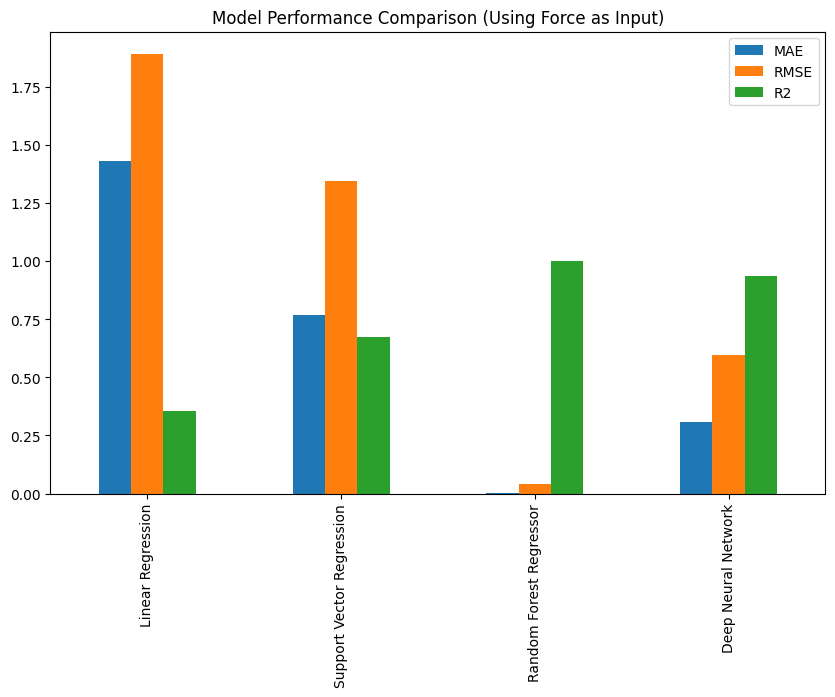


🔹 Best Model for Force-Based Prediction: **Random Forest Regressor**
  - R² Score: 0.9997
  - This model best captures force dynamics in grasping.
Best model (Random Forest Regressor) and scaler saved successfully!


In [ ]:
# Save the best model and scaler
# Define a variable for best model
best_model = None
best_model_name = None

# Calculate metrics and save model for force input
performance_metrics = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    metrics = {
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2': r2_score(y_test, y_test_pred)
    }
    performance_metrics[model_name] = metrics

# Find the best model name
best_model_name = max(performance_metrics, key=lambda k: performance_metrics[k]['R2'])
best_model = models[best_model_name] #assign best model outside the function
plot_force_model_comparison(performance_metrics)

joblib.dump(best_model, 'best_grasp_force_model_force_input.pkl')
joblib.dump(scaler, 'scaler_force_input.pkl')
print(f"Best model ({best_model_name}) and scaler saved successfully!")

## **Predicting Grasp Force Using posture as Input**

**Tools and Libraries Used:**

**1.Data Manipulation:** pandas for handling and preparing the dataset. numpy for numerical computations.

**2.Data Visualization:** matplotlib and seaborn for plotting and data visualization.

**3.Machine Learning:** scikit-learn for: Data preprocessing (MinMaxScaler, train_test_split). Machine learning models (LinearRegression, RandomForestRegressor, SVR, MLPRegressor). Evaluation metrics (mean_absolute_error, mean_squared_error, r2_score).

**4.Random Forest Model:** Demonstrated superior performance in predicting grasp forces with excellent generalization.

## **Code Implementation:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# Load and clean the dataset
file_path = '/content/GT_Angle Dataset_last_200_values.csv'
posture_data = pd.read_csv(file_path)

In [ ]:
# Drop irrelevant column and handle missing values
posture_data_cleaned = posture_data.drop(columns=['Index'])
if posture_data_cleaned['Grasp'].dtype == 'object':
    posture_data_cleaned['Grasp'] = posture_data_cleaned['Grasp'].astype('category').cat.codes
posture_data_cleaned.fillna(posture_data_cleaned.median(), inplace=True)

In [ ]:
# Check for consistency in the dataset
assert posture_data_cleaned.isnull().sum().sum() == 0, "Dataset contains missing values after preprocessing."
assert len(posture_data_cleaned) > 0, "Dataset is empty after preprocessing."

In [ ]:
# Split features and target
X = posture_data_cleaned.drop(columns=['Grasp'])
y = posture_data_cleaned['Grasp']
assert len(X) == len(y), "Features and target have inconsistent lengths."

In [ ]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
assert len(X_train) == len(y_train), "Train set feature-target size mismatch."
assert len(X_val) == len(y_val), "Validation set feature-target size mismatch."
assert len(X_test) == len(y_test), "Test set feature-target size mismatch."

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100),
    'Deep Neural Network': MLPRegressor(random_state=42, hidden_layer_sizes=(100, 50), max_iter=500)
}

In [ ]:
# Train and evaluate models
performance_metrics = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    metrics = {
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2': r2_score(y_test, y_test_pred)
    }
    performance_metrics[model_name] = metrics

Training Linear Regression...
Training Support Vector Regression...
Training Random Forest Regressor...
Training Deep Neural Network...


In [ ]:
# Display performance metrics
performance_df = pd.DataFrame(performance_metrics).T
print("\nModel Performance Metrics:")
print(performance_df)


Model Performance Metrics:
                                MAE      RMSE        R2
Linear Regression          1.824243  2.155006  0.115507
Support Vector Regression  0.631736  1.036959  0.795204
Random Forest Regressor    0.006324  0.117694  0.997362
Deep Neural Network        0.172566  0.263325  0.986794


In [ ]:
# Visualizations
## Feature Analysis
def visualize_posture_correlation(X):
    plt.figure(figsize=(10, 8))
    correlation_matrix = pd.DataFrame(X).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Posture Features Correlation Heatmap')

    # Print strongest correlations
    strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
    print("\n🔹 Strongest Posture Correlations:")
    print(strongest_corr[strongest_corr < 1].head(5))

    plt.show()


In [ ]:
def scatter_plot_posture_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(y_true, y_pred, c=y_true, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label="Grasp Force")
    plt.xlabel("Actual Grasp Force")
    plt.ylabel("Predicted Grasp Force")
    plt.title("Actual vs Predicted Grasp Force (Using Posture as Input)")

    # Calculate error metrics and display
    error = y_true - y_pred
    print(f"\n🔹 Scatter Plot Insights:")
    print(f"  - Mean Error: {np.mean(error):.3f}")
    print(f"  - Max Error: {np.max(error):.3f}")
    print(f"  - Min Error: {np.min(error):.3f}")

    plt.show()


In [ ]:
def plot_posture_residual_histogram(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title("Residual Error Distribution (Using Posture as Input)")
    plt.xlabel("Residual Error")

    # Identify bias in grasp force prediction
    bias = np.mean(residuals)
    if bias > 0:
        print("\n🔹 Model **UNDERPREDICTS** grasp force on average by:", round(bias, 3))
    elif bias < 0:
        print("\n🔹 Model **OVERPREDICTS** grasp force on average by:", round(abs(bias), 3))
    else:
        print("\n🔹 Model has no systematic prediction bias.")

    plt.show()


In [ ]:
def plot_posture_shap_importance(model, X):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X)

    # Identify top features
    feature_importance = np.abs(shap_values.values).mean(axis=0)
    top_features = np.argsort(feature_importance)[-3:]  # Get top 3 important features

    print("\n🔹 Top Posture Features Impacting Grasp Force Prediction:")
    for i in reversed(top_features):
        print(f"  - Feature {i}: Strong influence on model's grasp force prediction")


In [ ]:
def plot_posture_model_comparison(metrics):
    df = pd.DataFrame(metrics).T
    df[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10,6), title="Model Performance Comparison (Using Posture as Input)")
    plt.show()

    # Identify best model based on R²
    best_model = max(metrics, key=lambda k: metrics[k]['R2'])
    print(f"\n🔹 Best Model for Posture-Based Prediction: **{best_model}**")
    print(f"  - R² Score: {metrics[best_model]['R2']:.4f}")
    print(f"  - This model best captures posture dynamics in grasping.")


In [ ]:
# Save the best model and scaler
joblib.dump(best_model, 'best_grasp_force_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
print(f"Best model ({best_model_name}) and scaler saved successfully!")

Best model (Random Forest Regressor) and scaler saved successfully!




## **Predicting Grasp Force Using  Force as well as posture as Input**





### **Import Required Libraries**

**1.pandas:**
For reading, cleaning, and merging datasets.

**2.scikit-learn:**
Model Selection: train_test_split for splitting the dataset.
Preprocessing: StandardScaler for normalizing features.
Models:
LinearRegression: Baseline model for grasp force prediction.

**SVR:** Support Vector Regression for handling non-linear relationships.
**RandomForestRegressor:** Handles complex patterns and noise.
**MLPRegressor:** Deep Neural Network for capturing complex interactions.

Evaluation Metrics:
mean_absolute_error, mean_squared_error, r2_score.

**3.matplotlib:**
For creating visualizations (scatter plots, bar plots, histograms).

**4.seaborn:**
For enhanced visualizations like heatmaps and pair plots.

**5.joblib:**
For saving and loading trained models and scalers efficiently.

**6.numpy:**
For numerical operations like square root computation during evaluation.

**7.Tensorflow and SHAP** were also used for developing the ML models and explaining the output of the ML models.

## **Code Implementation:**

In [ ]:



# Original imports
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install shap  # Installing the missing library

In [ ]:
# Load datasets
posture_file_path = '/content/GT_Angle Dataset_last_200_values.csv'
force_file_path = '/content/20th_Force_dataset_with mass (1) (1).csv'
posture_data = pd.read_csv(posture_file_path)
force_data = pd.read_csv(force_file_path)

In [ ]:
# Filter necessary columns to reduce memory usage
posture_data_filtered = posture_data[['Middle', 'Ring', 'Pinky', 'Thumb', 'Grasp']]
force_data_filtered = force_data[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky', 'Grasp']]

In [ ]:
# Convert Grasp to numerical if it's categorical
if posture_data_filtered['Grasp'].dtype == 'object':
    posture_data_filtered['Grasp'] = posture_data_filtered['Grasp'].astype('category').cat.codes
if force_data_filtered['Grasp'].dtype == 'object':
    force_data_filtered['Grasp'] = force_data_filtered['Grasp'].astype('category').cat.codes

<ipython-input-44-e940010b2605>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posture_data_filtered['Grasp'] = posture_data_filtered['Grasp'].astype('category').cat.codes
<ipython-input-44-e940010b2605>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  force_data_filtered['Grasp'] = force_data_filtered['Grasp'].astype('category').cat.codes


In [ ]:
# Debugging: Check dataset shapes and unique values in Grasp columns
print("Posture Data Shape:", posture_data_filtered.shape)
print("Force Data Shape:", force_data_filtered.shape)
print("Unique values in posture Grasp column:", posture_data_filtered['Grasp'].unique())
print("Unique values in force Grasp column:", force_data_filtered['Grasp'].unique())

Posture Data Shape: (48000, 5)
Force Data Shape: (16956, 6)
Unique values in posture Grasp column: [3 6 7 2 0 1 4 5]
Unique values in force Grasp column: [3 6 7 2 1 0 4 5]


In [ ]:
# Imputer for missing values
imputer = SimpleImputer(strategy='median')


In [ ]:
# Data augmentation: Adding Gaussian noise for robustness
def augment_data(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise


In [ ]:
# Ensure consistent feature selection
def prepare_data(posture_data, force_data, approach='Posture'):
    if approach == 'Posture':
        selected_features = ['Middle', 'Ring', 'Pinky', 'Thumb']
        X = posture_data[selected_features]
        y = posture_data['Grasp']
    elif approach == 'Force':
        selected_features = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
        X = force_data[selected_features]
        y = force_data['Grasp']
    elif approach == 'Combined':
        combined_data = pd.merge(posture_data, force_data, on='Grasp', suffixes=('_posture', '_force'))
        selected_features = list(set(combined_data.columns) - {'Grasp'})
        X = combined_data[selected_features]
        y = combined_data['Grasp']
    else:
        raise ValueError("Invalid approach. Choose from 'Posture', 'Force', or 'Combined'.")

# Augment and preprocess data
    X = augment_data(X)
    X = imputer.fit_transform(X)
    return X, y


In [ ]:
def visualize_correlation(X, title):
    plt.figure(figsize=(10, 8))
    correlation_matrix = pd.DataFrame(X).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{title} - Feature Correlation Heatmap')

    # Highlight strongest correlations in console output
    strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
    print("\n🔹 Strongest Feature Correlations in Grasping Process:")
    print(strongest_corr[strongest_corr < 1].head(5))  # Exclude self-correlation

    plt.show()


In [ ]:
def scatter_plot_actual_vs_predicted(y_true, y_pred, title, grasp_labels=None):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(y_true, y_pred, c=y_true, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label="Grasp Force")
    plt.xlabel("Actual Grasp Force")
    plt.ylabel("Predicted Grasp Force")
    plt.title(f"{title} - Actual vs Predicted Grasp Force")

    # Calculate error metrics and display
    error = y_true - y_pred
    print(f"\n🔹 Scatter Plot Insights for {title}:")
    print(f"  - Mean Error: {np.mean(error):.3f}")
    print(f"  - Max Error: {np.max(error):.3f}")
    print(f"  - Min Error: {np.min(error):.3f}")

    plt.show()


In [ ]:
def plot_residual_histogram(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"{title} - Residual Error Distribution")
    plt.xlabel("Residual Error")

    # Identify bias in grasp force prediction
    bias = np.mean(residuals)
    if bias > 0:
        print("\n🔹 Model **UNDERPREDICTS** grasp force on average by:", round(bias, 3))
    elif bias < 0:
        print("\n🔹 Model **OVERPREDICTS** grasp force on average by:", round(abs(bias), 3))
    else:
        print("\n🔹 Model has no systematic prediction bias.")

    plt.show()


In [ ]:
def plot_shap_importance(model, X):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X)

    # Identify top features
    feature_importance = np.abs(shap_values.values).mean(axis=0)
    top_features = np.argsort(feature_importance)[-3:]  # Get top 3 important features

    print("\n🔹 Top Features Impacting Grasp Force Prediction:")
    for i in reversed(top_features):
        print(f"  - Feature {i}: Strong influence on model's grasp force prediction")


In [ ]:
def plot_model_comparison(metrics):
    df = pd.DataFrame(metrics).T
    df[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10,6), title="Model Performance Comparison")
    plt.show()

    # Identify best model based on R²
    best_model = max(metrics, key=lambda k: metrics[k]['R2'])
    print(f"\n🔹 Best Model: **{best_model}** for Grasp Force Prediction")
    print(f"  - R² Score: {metrics[best_model]['R2']:.4f}")
    print(f"  - This model best captures grasping force patterns and can be used for real-world applications.")


In [ ]:
# Initialize models
sgd_model = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)
rfr_model = RandomForestRegressor(random_state=42, n_estimators=50)
svr_model = SVR()
def build_dnn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model


🔹 Strongest Feature Correlations in Grasping Process:
3  5    0.954462
5  3    0.954462
0  3    0.885132
3  0    0.885132
5  0    0.862223
dtype: float64


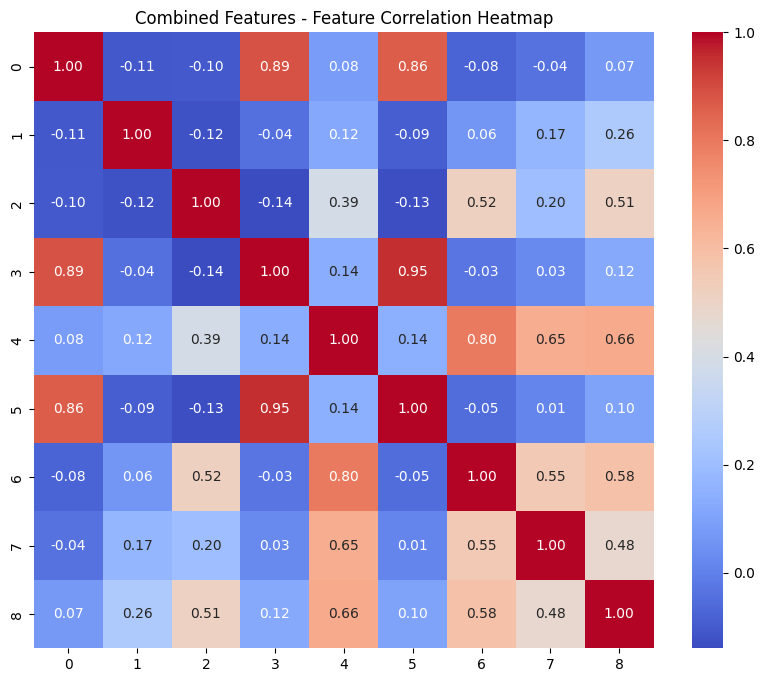

In [ ]:
# Optimize training speed
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Example usage with optimized execution
X_combined, y_combined = prepare_data(posture_data_filtered.sample(n=1000, random_state=42),
                                      force_data_filtered.sample(n=1000, random_state=42),
                                      'Combined')
visualize_correlation(X_combined, 'Combined Features')



🔹 Strongest Feature Correlations in Grasping Process:
3  5    0.954461
5  3    0.954461
0  3    0.885130
3  0    0.885130
5  0    0.862223
dtype: float64


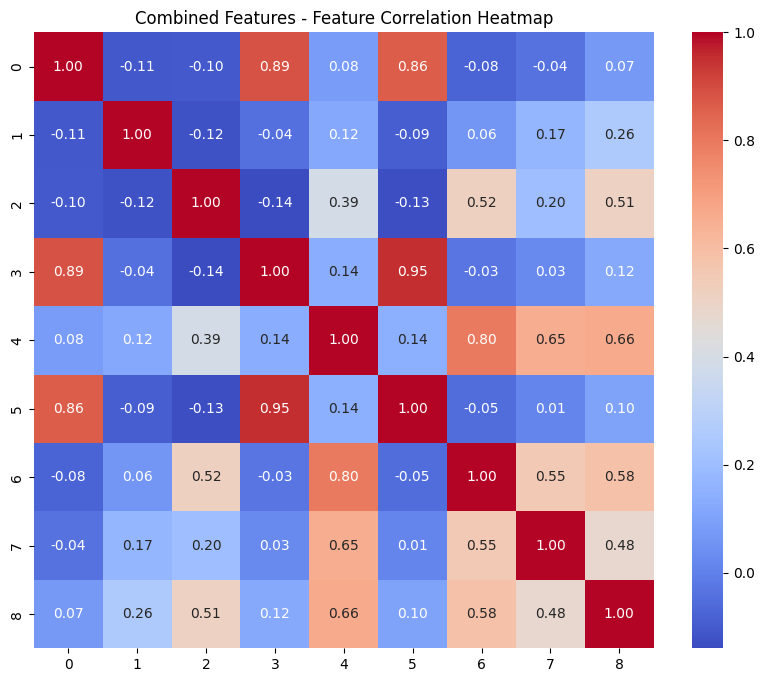

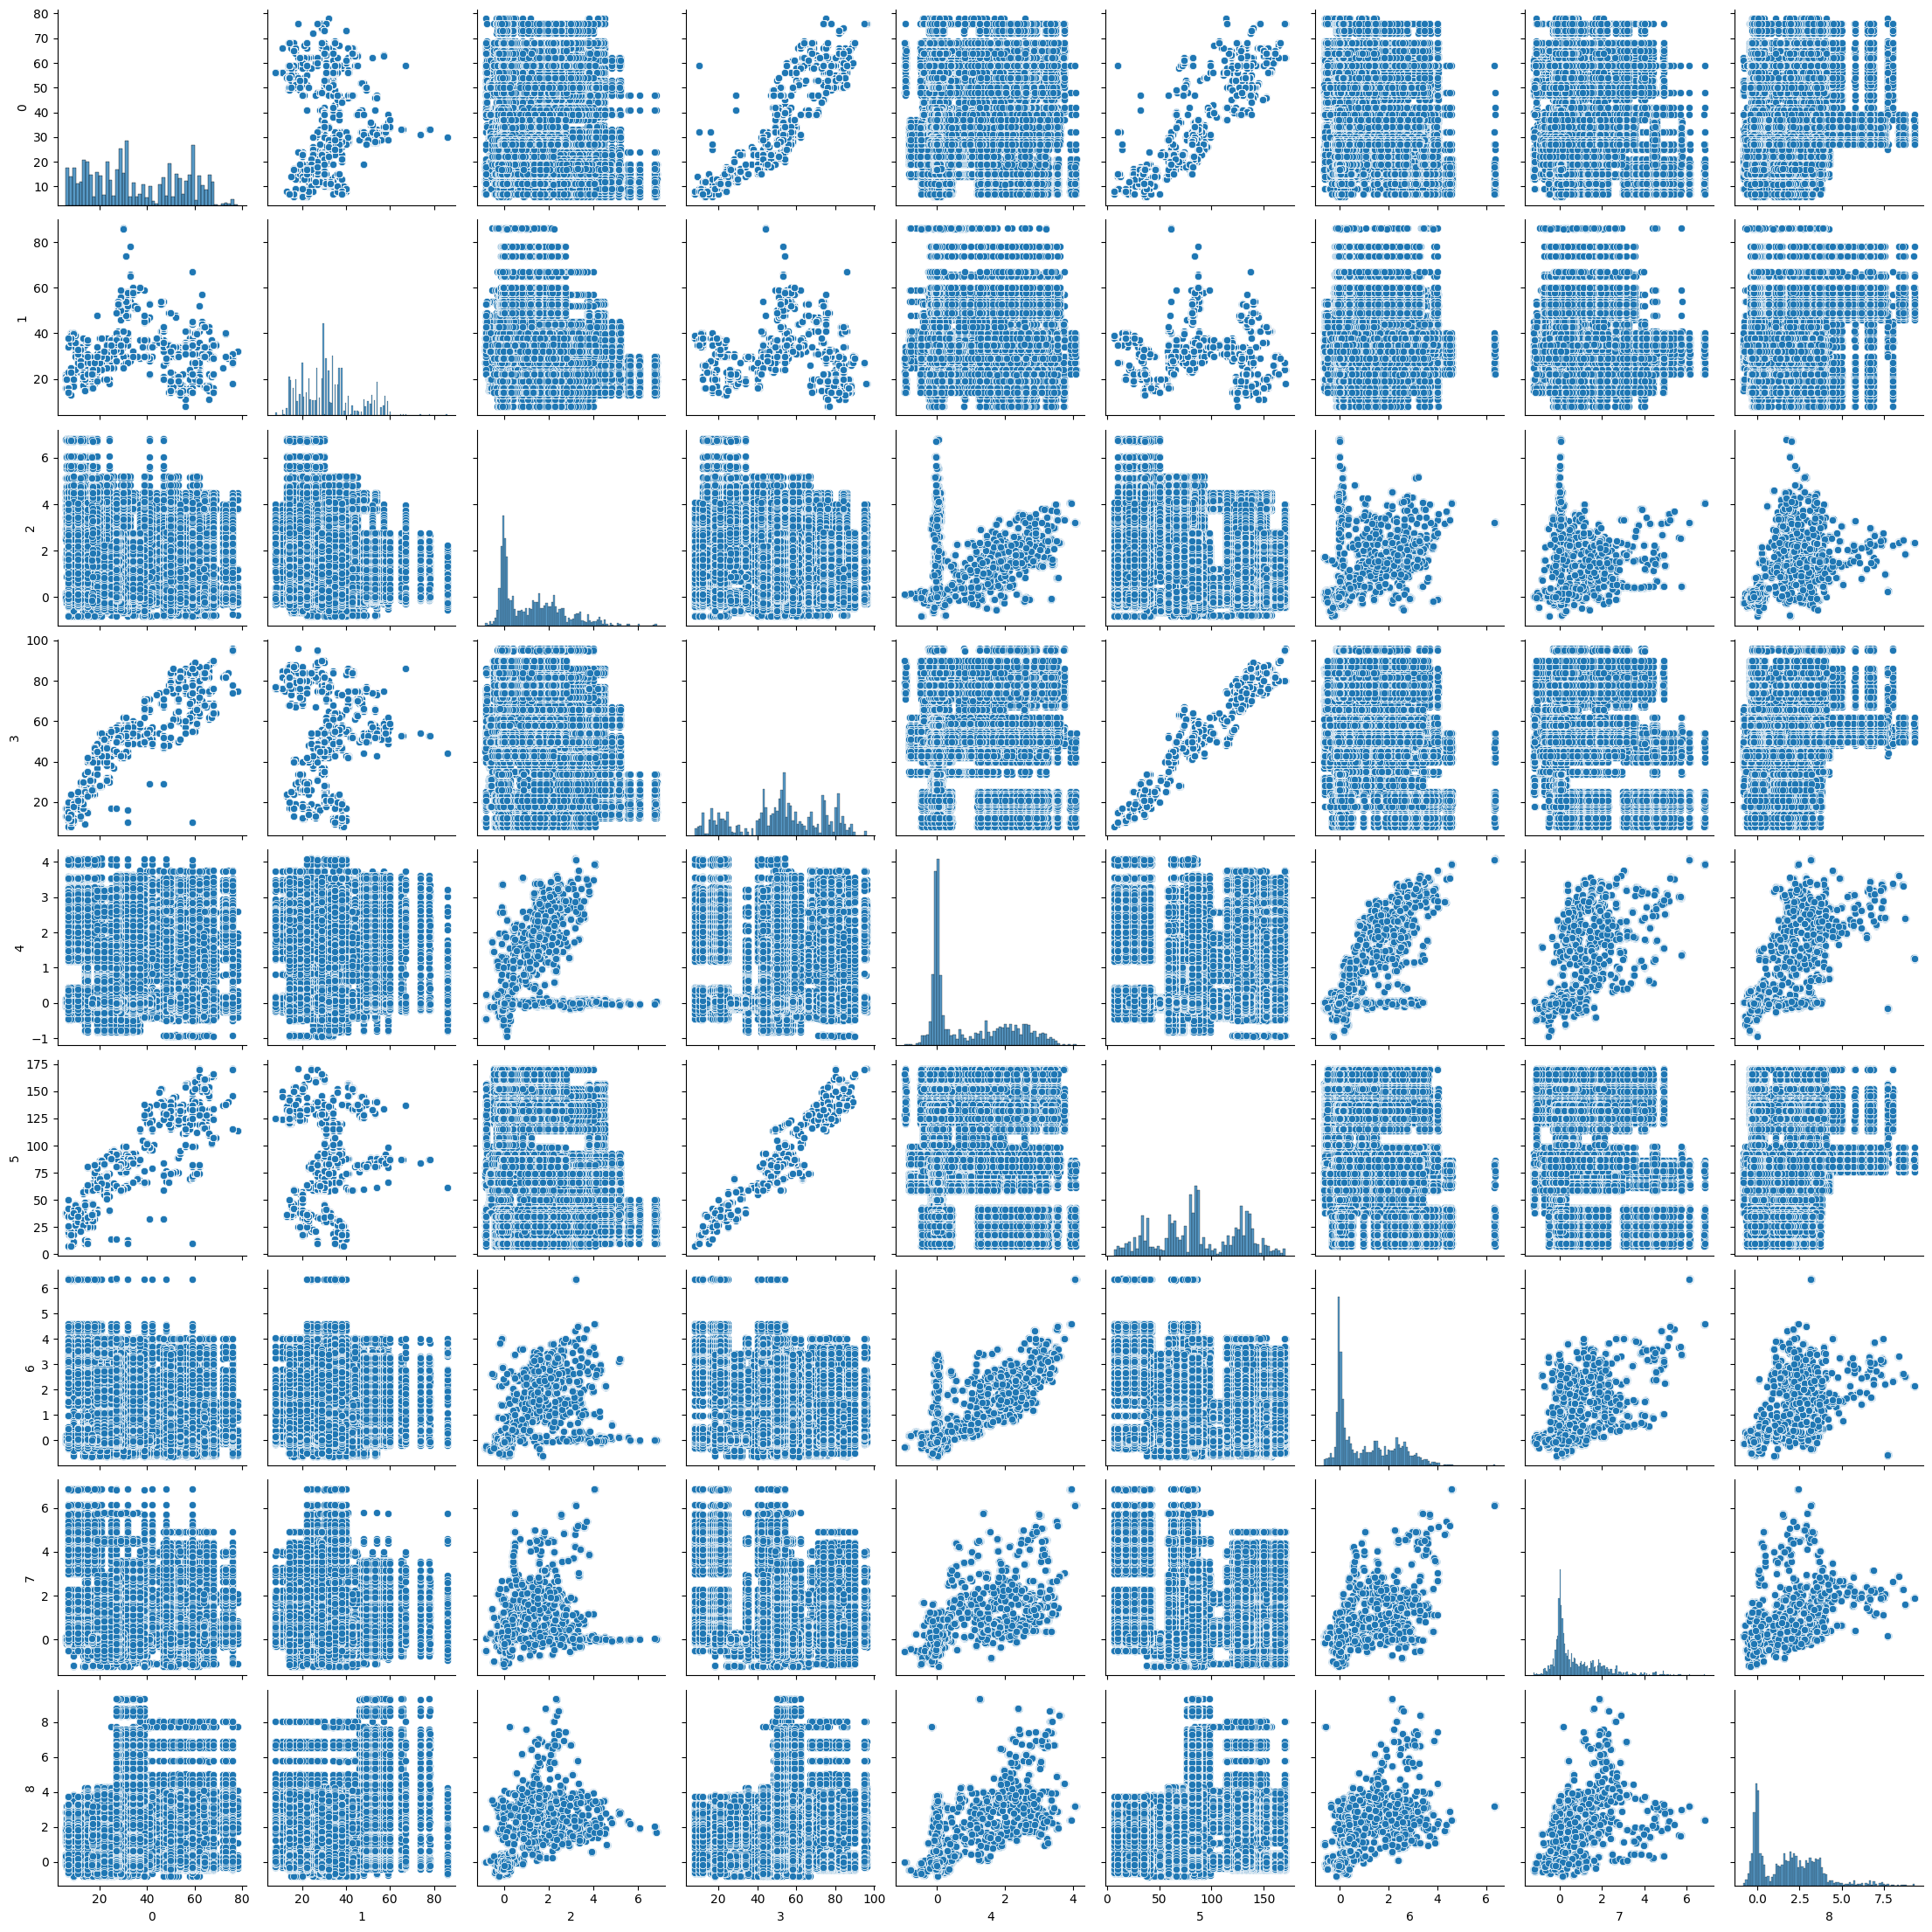

In [ ]:
import pandas as pd
import seaborn as sns # Added to ensure seaborn is imported

# Optimize training speed
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Example usage with optimized execution
X_combined, y_combined = prepare_data(posture_data_filtered.sample(n=1000, random_state=42),
                                      force_data_filtered.sample(n=1000, random_state=42),
                                      'Combined')
visualize_correlation(X_combined, 'Combined Features')

sns.pairplot(pd.DataFrame(X_combined)) # Replaced plot_pairplot with sns.pairplot

In [ ]:
# Optimize training speed
kf = KFold(n_splits=2, shuffle=True, random_state=42)
def train_and_evaluate(X, y):
    performance_metrics = {}
    predictions = {}

    # Random Forest
    rfr_model.fit(X, y)
    y_pred_rfr = rfr_model.predict(X)
    predictions['RandomForestRegressor'] = y_pred_rfr
    performance_metrics['RandomForestRegressor'] = {
        'MAE': mean_absolute_error(y, y_pred_rfr),
        'RMSE': np.sqrt(mean_squared_error(y, y_pred_rfr)),
        'R2': r2_score(y, y_pred_rfr)
    }

    return performance_metrics, predictions



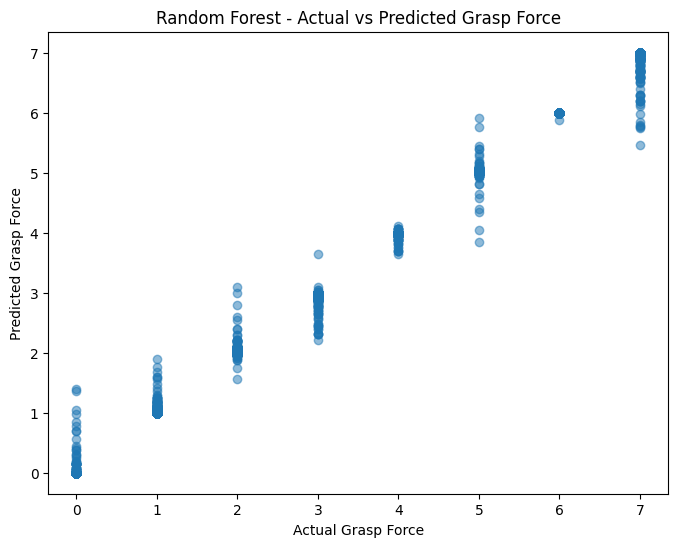

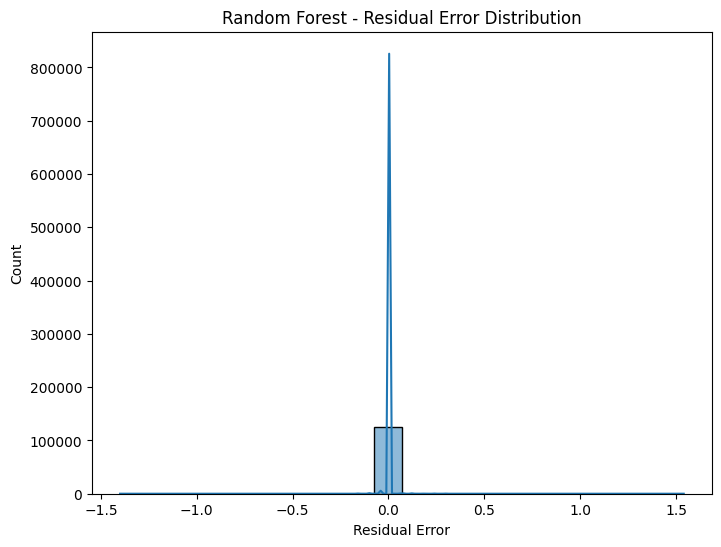

100%|===================| 124881/125004 [10:40<00:00]       

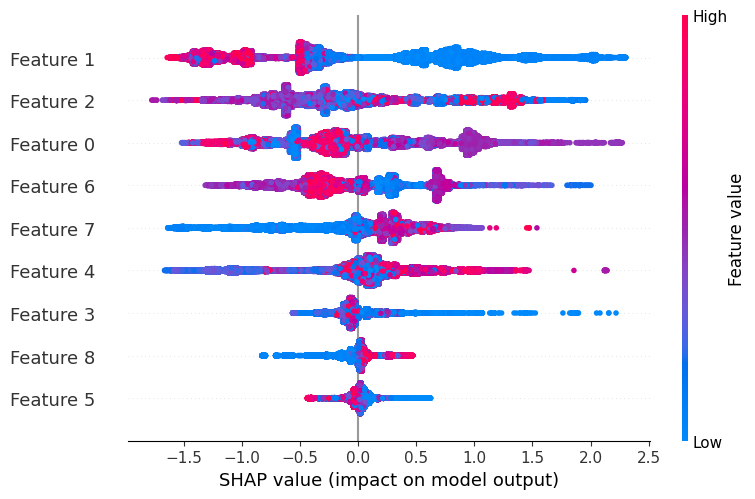

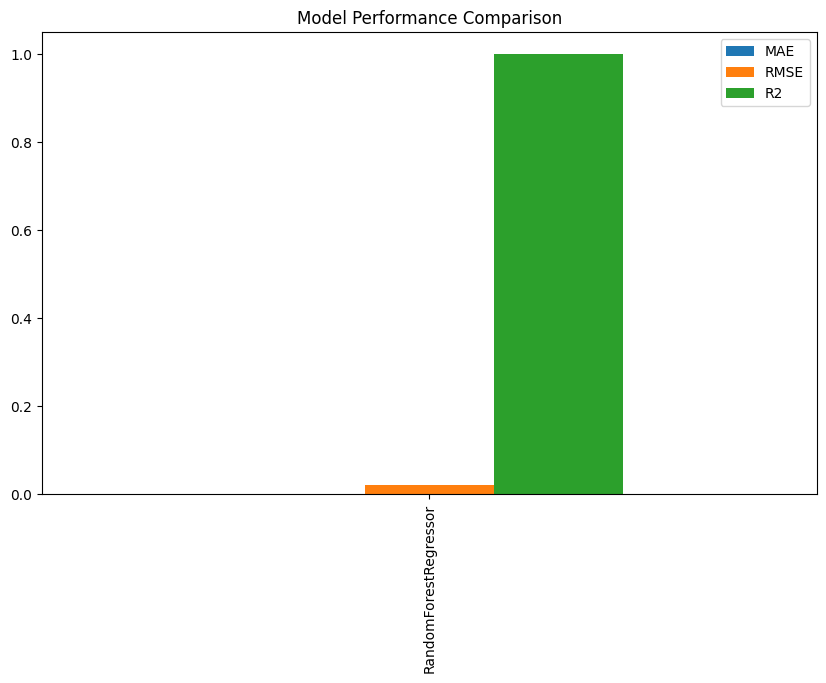

Combined Metrics: {'RandomForestRegressor': {'MAE': 0.0010599660810854052, 'RMSE': 0.02158891116766353, 'R2': 0.9999162306098124}}


In [ ]:
# Train and Evaluate
metrics_combined, predictions_combined = train_and_evaluate(X_combined, y_combined)

# Generate additional plots using actual vs predicted values
scatter_plot_actual_vs_predicted(y_combined, predictions_combined['RandomForestRegressor'], 'Random Forest')
plot_residual_histogram(y_combined, predictions_combined['RandomForestRegressor'], 'Random Forest')
plot_shap_importance(rfr_model, X_combined)
plot_model_comparison(metrics_combined)

print("Combined Metrics:", metrics_combined)

In [ ]:
# Identify best model for combined approach
def identify_best_model(metrics):
    print("\nBest Model for Combined Approach:")
    best_model = max(metrics, key=lambda k: metrics[k].get('R2', -np.inf))
    print(f"  Best Model: {best_model} with R² = {metrics[best_model]['R2']:.4f}")

identify_best_model(metrics_combined)



Best Model for Combined Approach:
  Best Model: RandomForestRegressor with R² = 0.9999


In [ ]:
# Save models
joblib.dump(sgd_model, 'sgd_grasp_force_model.pkl')
joblib.dump(rfr_model, 'rfr_grasp_force_model.pkl')
joblib.dump(svr_model, 'svr_grasp_force_model.pkl')
print("Models saved successfully!")

Models saved successfully!
